In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

np.random.seed(42)
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
all_data = pd.read_csv('olistpreprocesseddata/olistpre1/OLIST_ALL_DATA.csv')

In [3]:
import gc
from datetime import datetime
import time
import warnings
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
sns.set(style="ticks")
#sns.set_context("poster", font_scale = .2, rc={"grid.linewidth": 2})
import sklearn
import scipy

import random
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [4]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='navy')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['navy', 'crimson', 'green', 'red', 'cyan'], labels=['good', 'bad', 'fair', 'bald', 'none']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1], sizes[2], sizes[3], sizes[4]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='navy')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['navy', 'crimson'], labels=['good', 'bad']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)

In [5]:
df = pd.read_csv("olistpreprocesseddata/olistpre1/OLIST_ALL_DATA.csv")

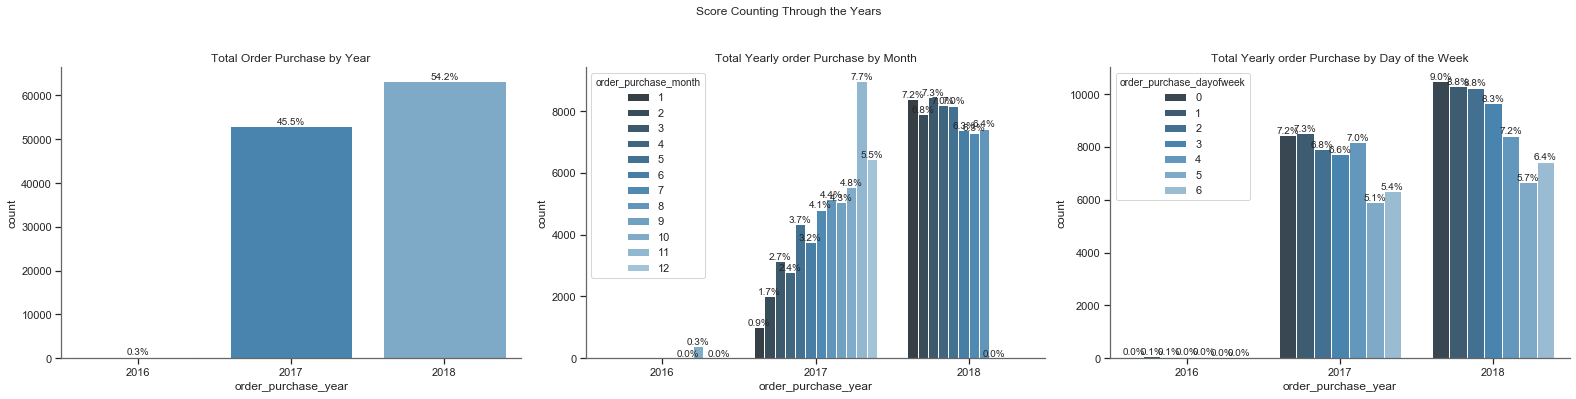

In [6]:
# Creating new datasets for each year
df_2016 = df.query('order_purchase_year=="2016"')
df_2017 = df.query('order_purchase_year=="2017"')
df_2018 = df.query('order_purchase_year=="2018"')

#displaying total orders in years, comparitive year on month, and month on days of the week
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
count_plot(feature='order_purchase_year', df=df, ax=axs[0], title='Total Order Purchase by Year')
count_plot(feature='order_purchase_year', df=df, ax=axs[1], hue='order_purchase_month', title='Total Yearly order Purchase by Month')
count_plot(feature='order_purchase_year', df=df, ax=axs[2], hue='order_purchase_dayofweek', title='Total Yearly order Purchase by Day of the Week')
#format_spines(ax, right_border=False)
plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()

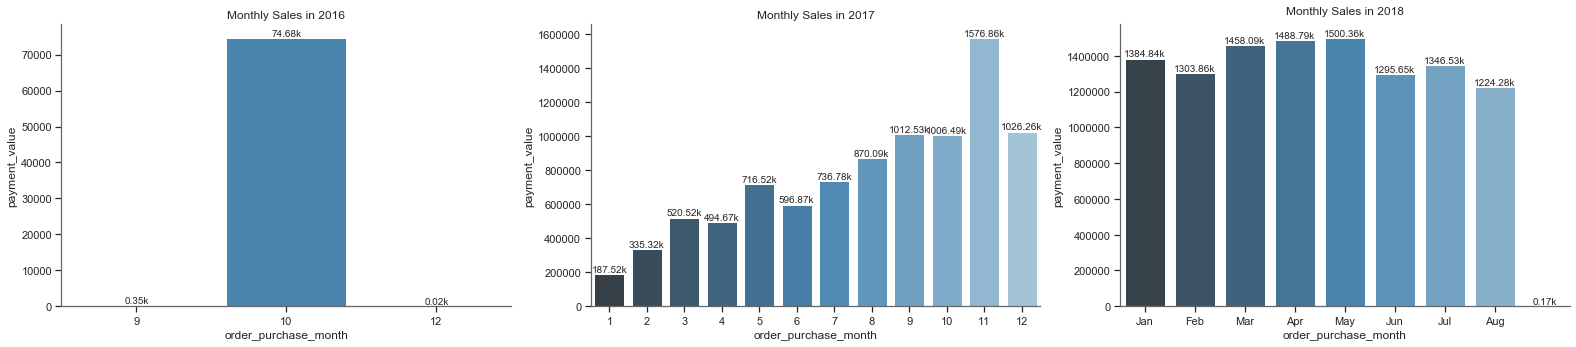

In [7]:
# Grouping by annual and monthly sales
df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_month', 'payment_value']]
df_ytsales2 = df.groupby(['order_purchase_year', 'order_purchase_dayofweek'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_dayofweek', 'payment_value']]
#df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek', 'payment_value']]

df_s2016 = df_ytsales[df_ytsales['order_purchase_year']==2016]
df_s2017 = df_ytsales[df_ytsales['order_purchase_year']==2017]
df_s2018 = df_ytsales[df_ytsales['order_purchase_year']==2018]

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.xticks(np.arange(8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.show()

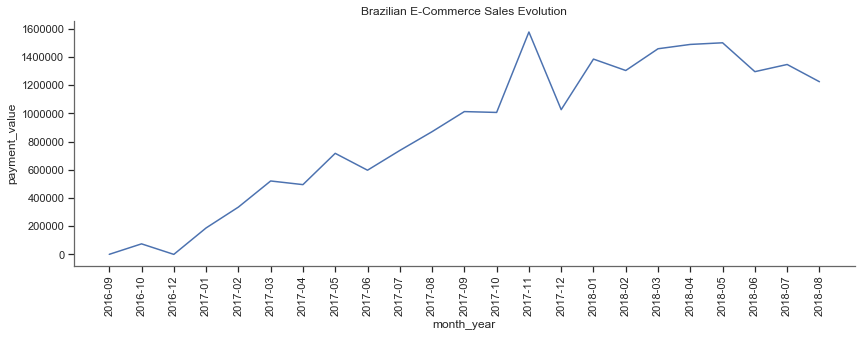

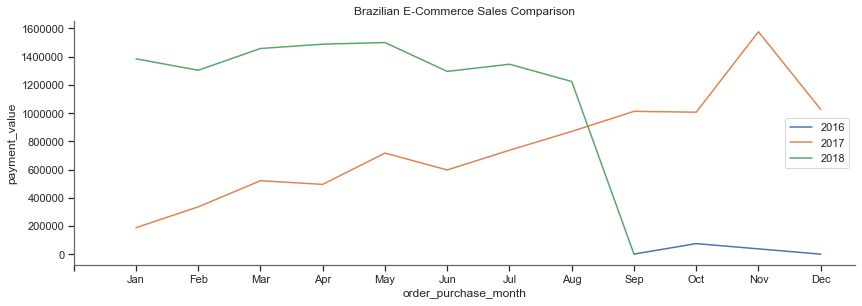

In [9]:
# Changing the month attribute for correct ordenation
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_ytsales['month_year'] = df_ytsales['order_purchase_year'].astype(str) + '-' + df_ytsales['order_purchase_month'].astype(str)
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(14, 4.5))
ax = sns.lineplot(x='month_year', y='payment_value', data=df_ytsales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Brazilian E-Commerce Sales Evolution')
plt.show()

fig, ax = plt.subplots(figsize=(14, 4.5))

ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2016, label='2016')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2018, label='2018')
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

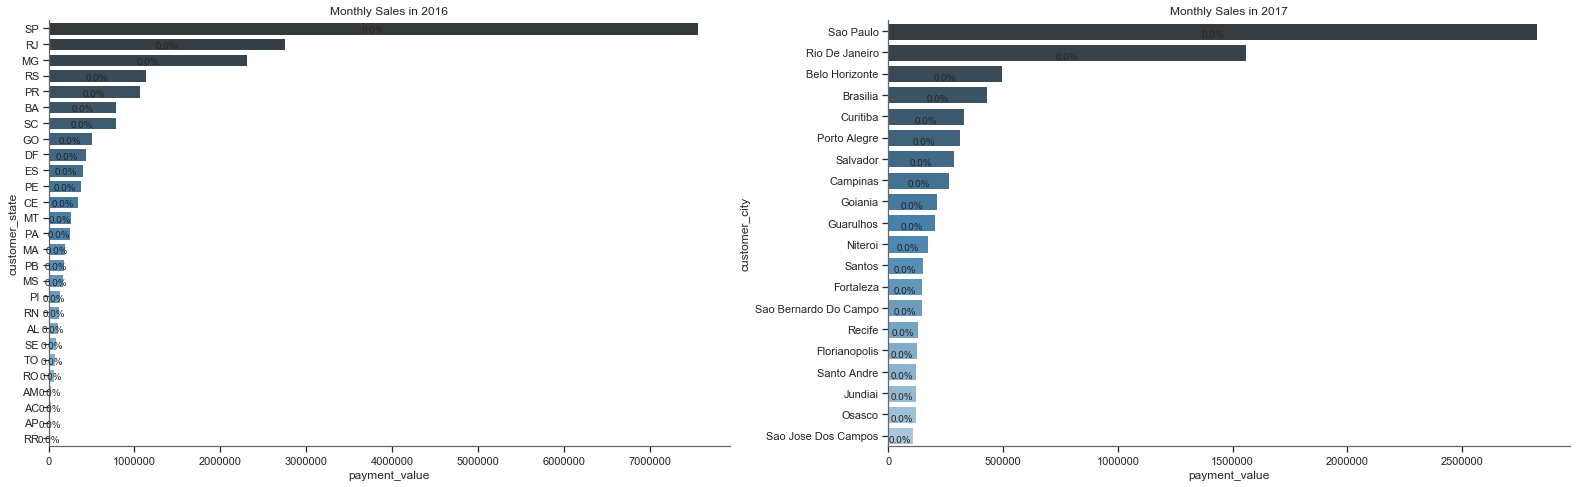

In [10]:
# Grouping by customer state
df_cus_st = df.groupby(['customer_state'], as_index=False).sum().loc[:, ['customer_state', 'payment_value']].sort_values(by='payment_value', ascending=False)
df_cus_ct = df.groupby(['customer_city'], as_index=False).sum().loc[:, ['customer_city', 'payment_value']].sort_values(by='payment_value', ascending=False).head(20)

fig, axs = plt.subplots(1, 2, figsize=(22, 7))
bar_plot(x='payment_value', y='customer_state', df=df_cus_st, ax=axs[0], value=False)
bar_plot(x='payment_value', y='customer_city', df=df_cus_ct, ax=axs[1], value=False)
format_spines(ax, right_border=False)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
plt.savefig("kk.jpg")
plt.show()

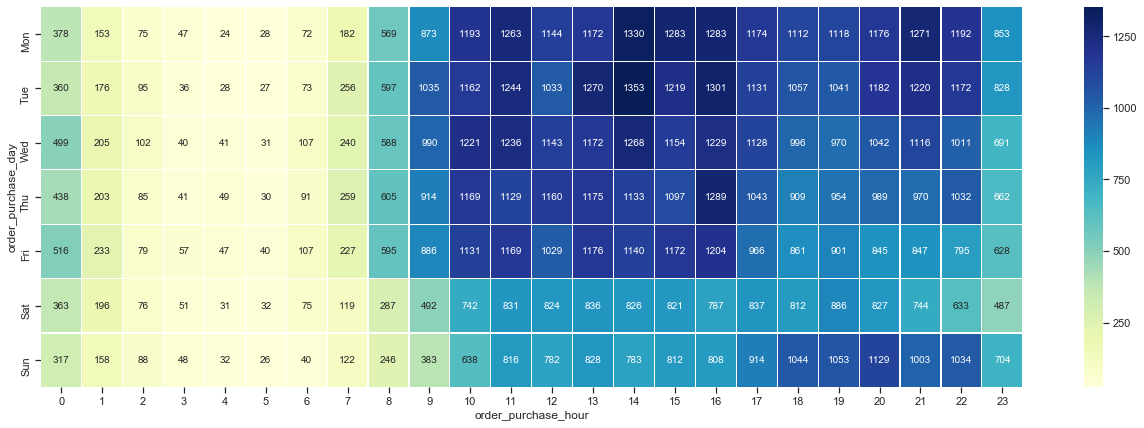

In [11]:
#customer and eliverybehaviour

purchase_count = df.groupby(['order_purchase_day', 'order_purchase_hour']).count()['price'].unstack()
plt.figure(figsize=(22,7))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.show()

In [12]:
# 2.3. Feature Extraction
# At this stage, a new column is added containing calculations from several columns to get new features

In [13]:
#Meruba tipe data pada kolom tanggal agar seusai tipe datanya 
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 
for col in date_columns:
    all_data[col] = pd.to_datetime(all_data[col], format='%Y-%m-%d %H:%M:%S')

In [14]:
#Create an order_process_time column to see how long it will take from the start of the order
#goods received by the customer
all_data ['order_process_time'] = all_data ['order_delivered_customer_date'] - all_data ['order_purchase_timestamp']

In [15]:
#Create an order_delivery_time column to see how long each order will take for delivery
all_data ['order_delivery_time'] = all_data ['order_delivered_customer_date'] - all_data ['order_delivered_carrier_date']

In [16]:


#Create an order_time_accuracy column to see if the estimated time until there is an appropriate or late one
#If the value is + positive, then he arrives faster, if 0 then he is on time, but if - negative then he is late
all_data ['order_accuracy_time'] = all_data ['order_estimated_delivery_date'] - all_data ['order_delivered_customer_date']

In [17]:
# Create an order_approved_time column to see how long it will take from the order until it is approved
all_data ['order_approved_time'] = all_data ['order_approved_at'] - all_data ['order_purchase_timestamp']

In [18]:
# Make a review_send_time column to find out how long it will take a satisfaction survey to be sent after the item is received
all_data ['review_send_time'] = all_data ['review_creation_date'] - all_data ['order_delivered_customer_date']

In [19]:
#Create a review_answer_time column to find out how long it will take to fill out the review after
# sent customer satisfaction survey.
all_data ['review_answer_time'] = all_data ['review_answer_timestamp'] - all_data ['review_creation_date']

In [20]:
# Combine the product_length_cm, product_height_cm, and product_width_cm columns to make it a volume
#with a new column, namely product_volume
all_data ['product_volume'] = all_data ['product_length_cm'] * all_data ['product_height_cm'] * all_data ['product_width_cm']

In [21]:
# 2.4 Data Exploration
# This stage is carried out by exploring the data to get insights or information that can be useful for the company

Text(0, 0.5, 'Product category')

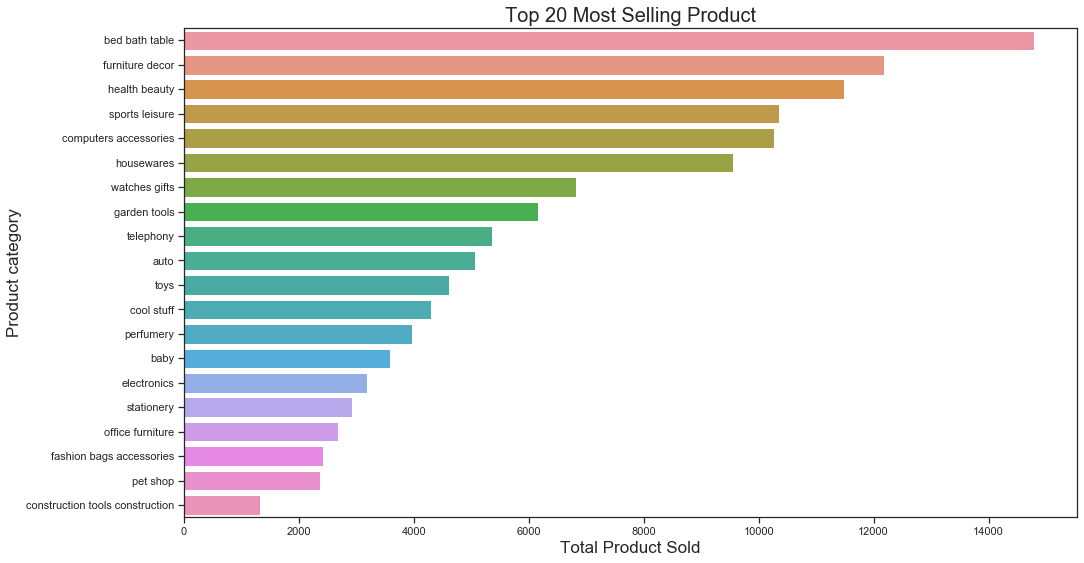

In [22]:



top_20_product_best_seller = all_data['order_item_id'].groupby(all_data['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Most Selling Product',fontsize=20)
plt.xlabel('Total Product Sold',fontsize=17)
plt.ylabel('Product category',fontsize=17)

Text(0, 0.5, 'City')

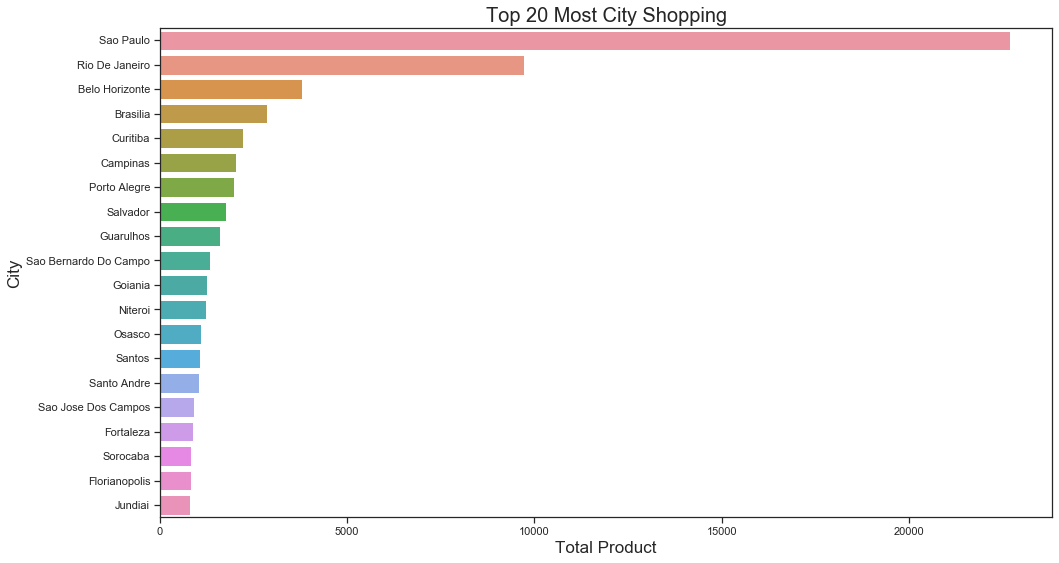

In [23]:
#Which city is shopping the most?
top_20_city_shopping = all_data ['order_item_id']. groupby (all_data ['customer_city']). sum (). sort_values (ascending = False) [: 20]
#print (top_20_city_shopping)

#We plot the visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = top_20_city_shopping.index, x = top_20_city_shopping.values)
plt.title ('Top 20 Most City Shopping', fontsize = 20)
plt.xlabel ('Total Product', fontsize = 17)
plt.ylabel ('City', fontsize = 17)

customer_id
23724    63
45815    38
54031    29
905      26
56464    24
75689    24
17455    24
56888    24
93095    24
88311    22
Name: order_item_id, dtype: int64


Text(0, 0.5, 'No of Products ordered')

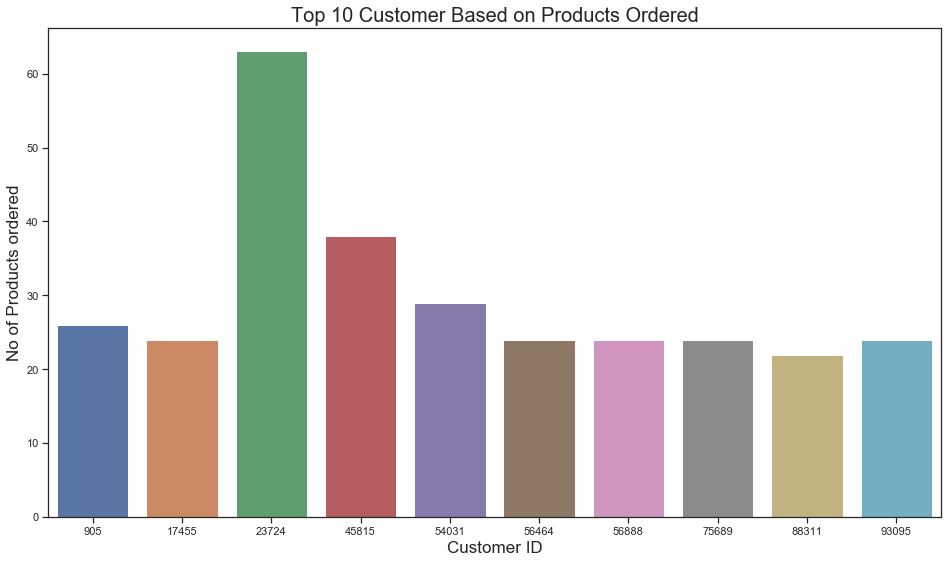

In [24]:
top_10_customer_shopping = all_data['order_item_id'].groupby(all_data['customer_id']).count().sort_values(ascending=False)[:10]
print(top_10_customer_shopping)

#Kita plot untuk visualisasinya
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.values,x=top_10_customer_shopping.index)
plt.title('Top 10 Customer Based on Products Ordered',fontsize=20)
plt.xlabel('Customer ID',fontsize=17)
plt.ylabel('No of Products ordered',fontsize=17)

customer_id
66626    109312.64
16698     45256.00
88261     44048.00
53012     36489.24
96537     30186.00
82936     29099.52
28835     22346.60
5524      21874.05
1833      19457.04
1886      19174.38
Name: payment_value, dtype: float64


Text(0, 0.5, 'Spending Amount')

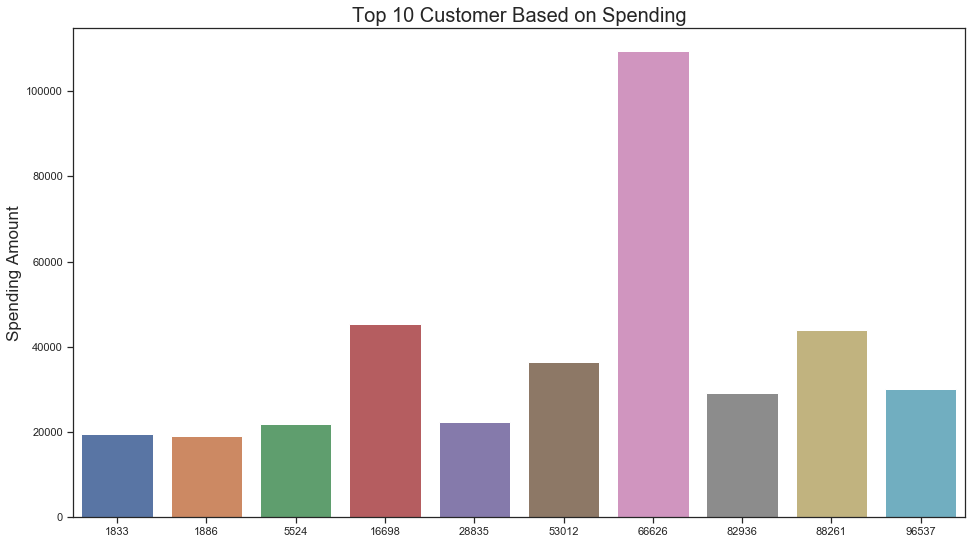

In [25]:
top_10_customer_shopping = all_data['payment_value'].groupby(all_data['customer_id']).sum().sort_values(ascending=False)[:10]
print(top_10_customer_shopping)


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.values,x=top_10_customer_shopping.index)
plt.title('Top 10 Customer Based on Spending',fontsize=20)
plt.xlabel('',fontsize=17)
plt.ylabel('Spending Amount',fontsize=17)


Text(0, 0.5, 'Seller ID')

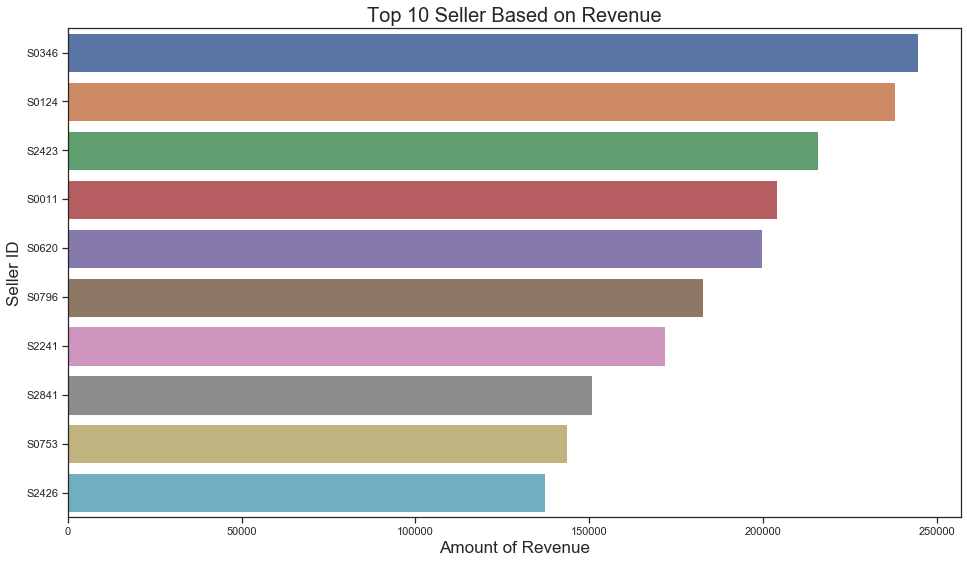

In [26]:
top_10_seller_order = all_data['price'].groupby(all_data['seller_id']).sum().sort_values(ascending=False)[:10]
#print(top_10_seller_order)


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.values)
plt.title('Top 10 Seller Based on Revenue',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

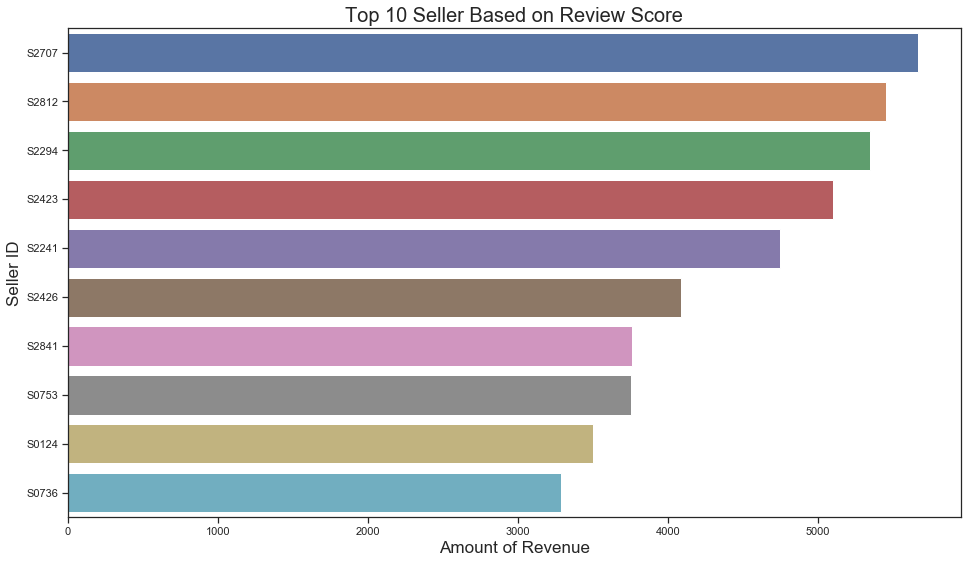

In [27]:
top_10_seller_order = all_data[all_data['review_score'] == 5].groupby(all_data['seller_id']).sum().sort_values(by=['review_score'],ascending=False)[:10]
#print(top_10_seller_order)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.review_score)
plt.title('Top 10 Seller Based on Review Score',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

In [28]:
round(all_data.order_status.value_counts() / len(all_data),2)

delivered      0.98
shipped        0.01
canceled       0.00
invoiced       0.00
processing     0.00
unavailable    0.00
approved       0.00
Name: order_status, dtype: float64

In [29]:
all_data['Month_order'] = all_data['order_purchase_timestamp'].dt.to_period('M').astype('str')

Text(0, 0.5, 'Time (Day)')

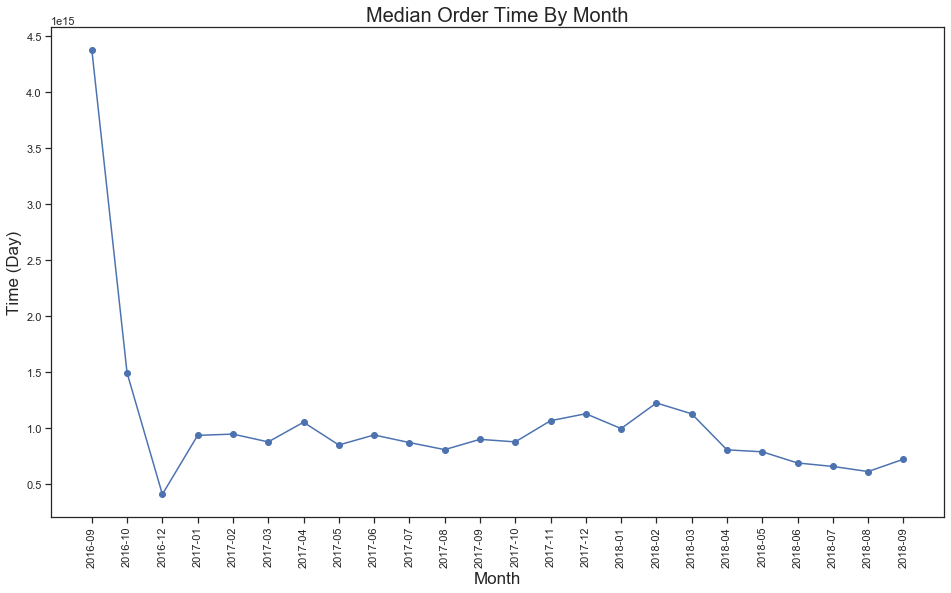

In [30]:
order_time_by_month = all_data['order_process_time'].groupby(all_data['Month_order']).median(numeric_only=False)

fig=plt.figure(figsize=(16,9))
plt.plot(order_time_by_month.index, order_time_by_month.values, marker='o')
plt.title('Median Order Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#         ['January', 'February', 'March','April', 'Mei', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
          rotation=90)
plt.ylabel('Time (Day)',fontsize=17)

Text(0, 0.5, 'Time (Day)')

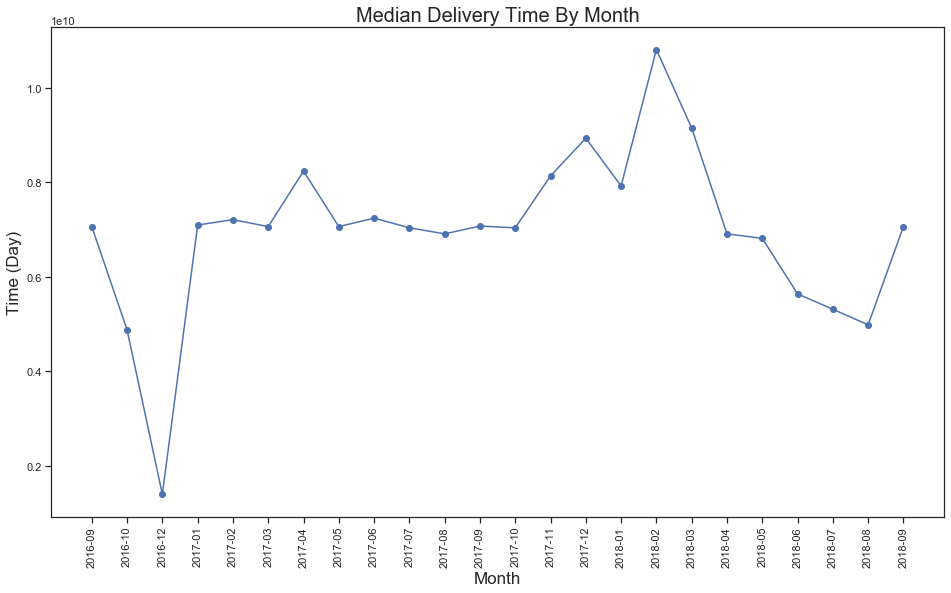

In [31]:
# What is the median delivery time for each monthly order?
delivery_time_by_month = all_data ['order_delivery_time']. groupby (all_data ['Month_order']). median (numeric_only = False) # enter numeric_only arguments to calculate timedelta

#Create the visualization
fig = plt.figure (figsize = (16,9))
plt.plot (delivery_time_by_month.index, delivery_time_by_month.values / 86400, marker = 'o')
plt.title ('Median Delivery Time By Month', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ,
           rotation = 90)
plt.ylabel ('Time (Day)', fontsize = 17)

Text(0, 0.5, 'Time (Day)')

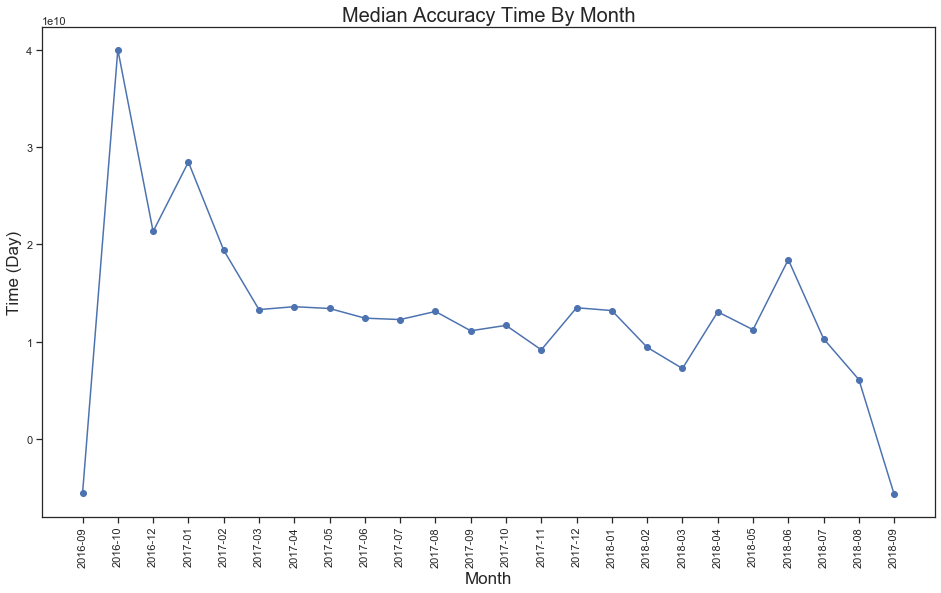

In [32]:
# What is the median accuracy of the estimated delivery time end up to the customer in each order per month?
accuracy_time_by_month = all_data ['order_accuracy_time']. groupby (all_data ['Month_order']). median (numeric_only = False) # enter numeric_only arguments to calculate timedelta

#Create the visualization
fig = plt.figure (figsize = (16,9))
plt.plot (accuracy_time_by_month.index, accuracy_time_by_month.values / 86400, marker = 'o')
plt.title ('Median Accuracy Time By Month', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ,
           rotation = 90)
plt.ylabel ('Time (Day)', fontsize = 17)

Text(0, 0.5, 'Product Category')

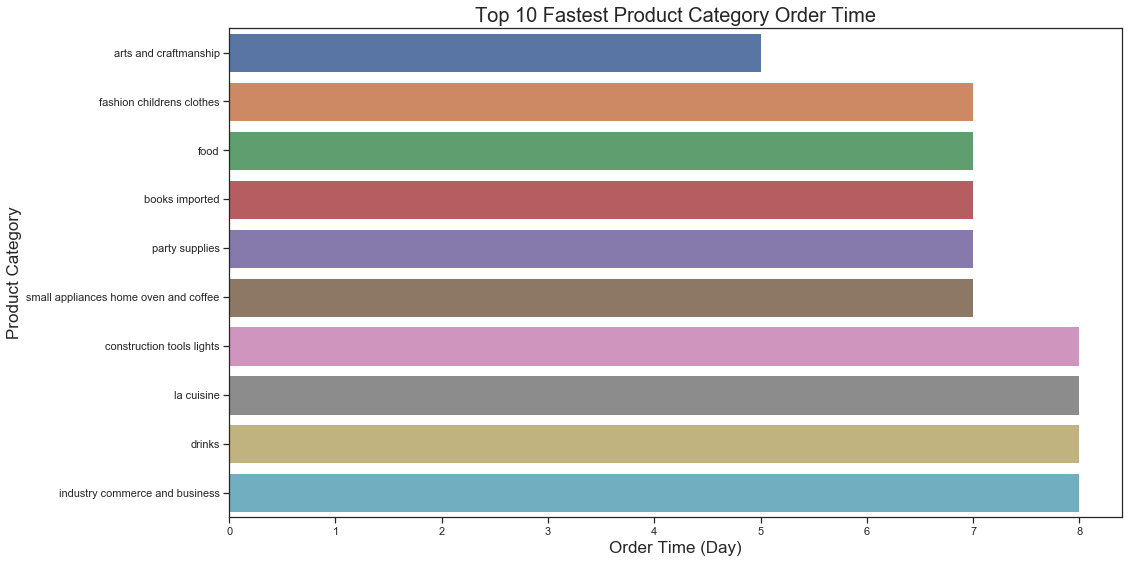

In [33]:
# 10 product categories with the fastest time from order to customer acceptance
order_time_by_category = pd.DataFrame (all_data ['order_process_time']. groupby (all_data ['product_category_name_english']). median (numeric_only = False) .sort_values (ascending = True) [: 10])

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_time_by_category.index, x = order_time_by_category ['order_process_time']. dt.days)
plt.title ('Top 10 Fastest Product Category Order Time', fontsize = 20)
plt.xlabel ('Order Time (Day)', fontsize = 17)
plt.ylabel ('Product Category', fontsize = 17)

Text(0, 0.5, 'Product Category')

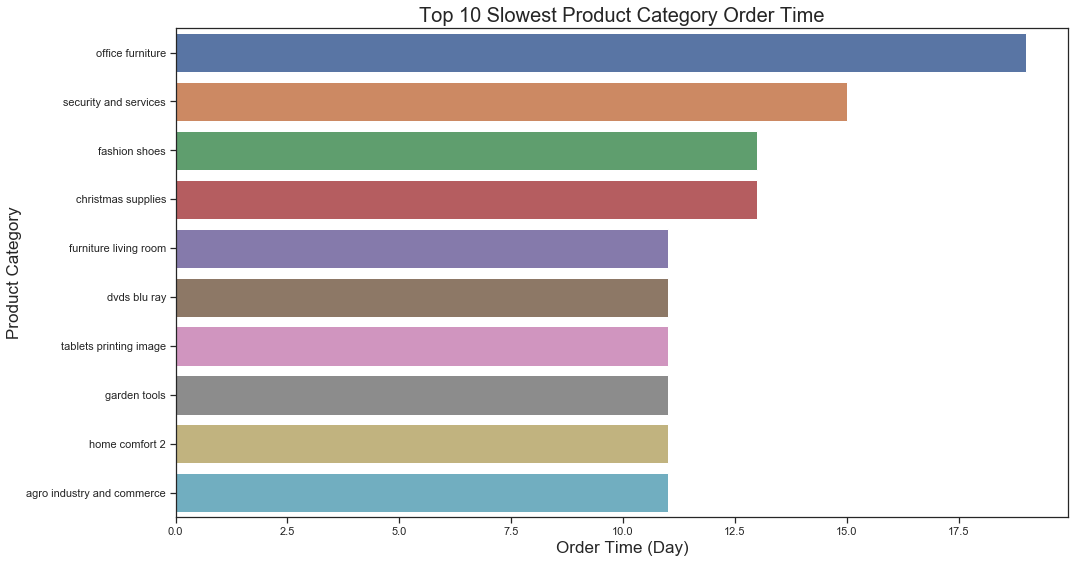

In [34]:
# 10 product categories with the longest time from order to customer acceptance
order_time_by_category = pd.DataFrame (all_data ['order_process_time']. groupby (all_data ['product_category_name_english']). median (numeric_only = False) .sort_values (ascending = False) [: 10])

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_time_by_category.index, x = order_time_by_category ['order_process_time']. dt.days)
plt.title ('Top 10 Slowest Product Category Order Time', fontsize = 20)
plt.xlabel ('Order Time (Day)', fontsize = 17)
plt.ylabel ('Product Category', fontsize = 17)

Text(0, 0.5, 'Amount Order')

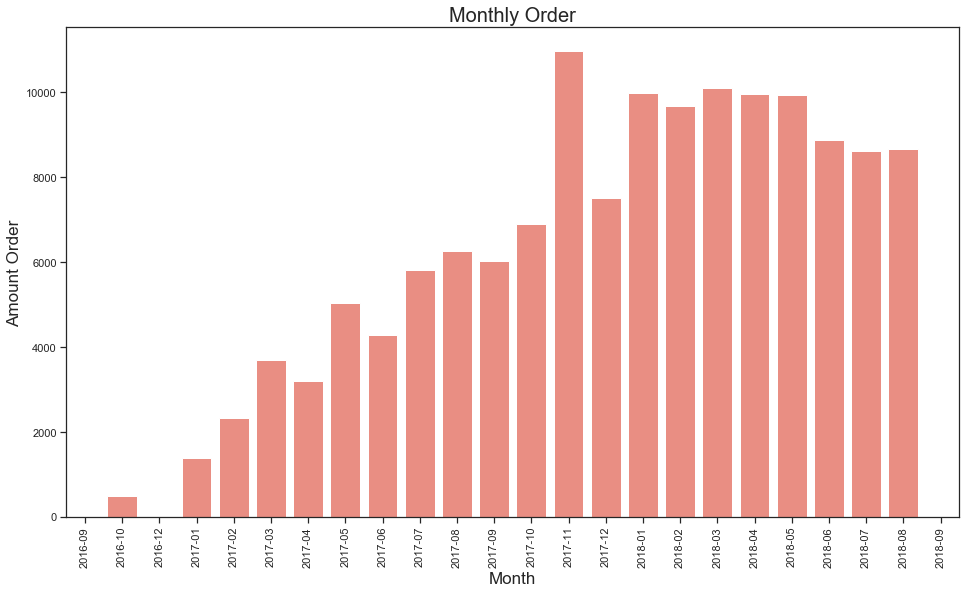

In [35]:
#What are the orders each month?
order_count_by_month = all_data ['order_item_id']. groupby (all_data ['Month_order']). sum ()

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_count_by_month.values, x = order_count_by_month.index, color = "Salmon")
plt.title ('Monthly Order', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (rotation = 90)
plt.ylabel ('Amount Order', fontsize = 17)

Text(0, 0.5, 'Amount Revenue')

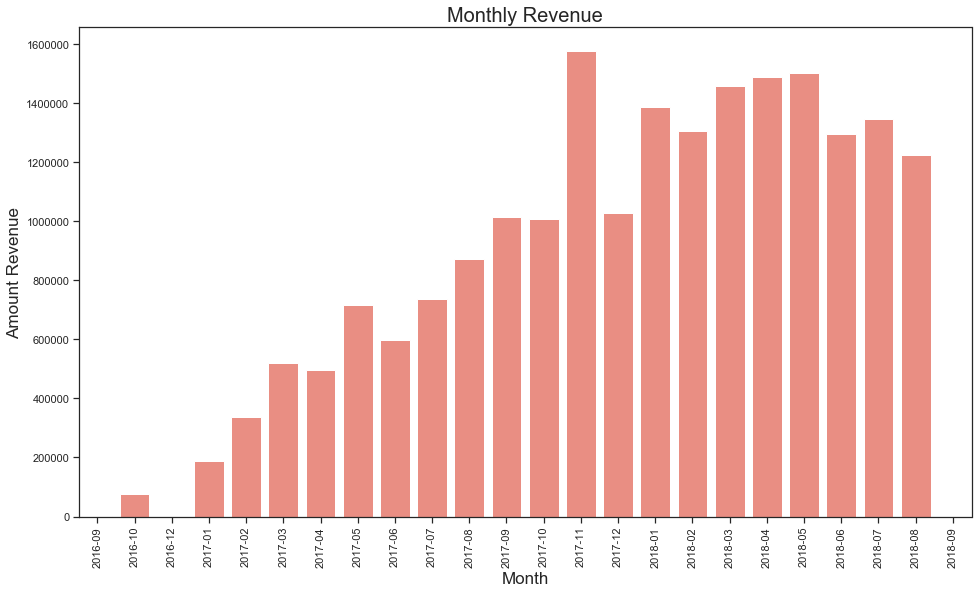

In [36]:
#How much is your monthly revenue?
revenue_count_by_month = all_data ['payment_value']. groupby (all_data ['Month_order']). sum ()

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = revenue_count_by_month.values, x = revenue_count_by_month.index, color = "Salmon")
plt.title ('Monthly Revenue', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (rotation = 90)
plt.ylabel ('Amount Revenue', fontsize = 17)

In [37]:
olist_payments= pd.read_csv('olistpreprocesseddata/olistpre1/olist_order_payments_dataset_new.csv')

In [38]:
olist_payments['value_log'] = olist_payments['payment_value'].apply(lambda x: np.log(x) if x > 0 else 0)
unique_ = olist_payments['order_id'].nunique()
print("DataFrame shape: {}; unique order ids: {}".format(olist_payments.shape, unique_))
olist_payments.head()

DataFrame shape: (103886, 7); unique order ids: 99440


order_id                         order_id3  payment_sequential payment_type  \
0  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   1  credit_card   
1  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   3      voucher   
2  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   2      voucher   
3  ON12238  53cdb2fc8bc7dce0b6741e2150273451                   1       boleto   
4  ON21442  47770eb9100c2d0c44946d9cf07ec65d                   1  credit_card   

   payment_installments  payment_value  value_log  
0                     1          18.12   2.897016  
1                     1           2.00   0.693147  
2                     1          18.59   2.922624  
3                     1         141.46   4.952017  
4                     3         179.12   5.188056

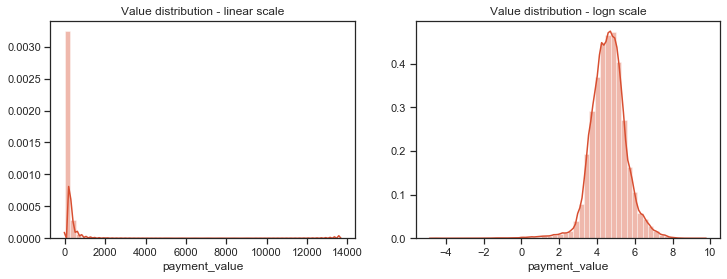

In [39]:
def plot_dist(values, log_values, title, color="#D84E30"):
    fig, axis = plt.subplots(1, 2, figsize=(12,4))
    axis[0].set_title("{} - linear scale".format(title))
    axis[1].set_title("{} - logn scale".format(title))
    ax1 = sns.distplot(values, color=color, ax=axis[0])
    ax2 = sns.distplot(log_values, color=color, ax=axis[1])
log_value = olist_payments.payment_value.apply(lambda x: np.log(x) if x > 0 else 0)
plot_dist(olist_payments.payment_value, log_value, "Value distribution")

In [40]:
olist_payments.describe()

payment_sequential  payment_installments  payment_value      value_log
count       103886.000000         103886.000000  103886.000000  103886.000000
mean             1.092679              2.853349     154.100380       4.597031
std              0.706584              2.687051     217.494064       0.937496
min              1.000000              0.000000       0.000000      -4.605170
25%              1.000000              1.000000      56.790000       4.039360
50%              1.000000              1.000000     100.000000       4.605170
75%              1.000000              4.000000     171.837500       5.146549
max             29.000000             24.000000   13664.080000       9.522526

In [41]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import colorlover as cl


In [42]:
#pip install plo

In [43]:
#pip install colorlover

In [44]:
#pip install jupyterlab "ipywidgets>=7.5"

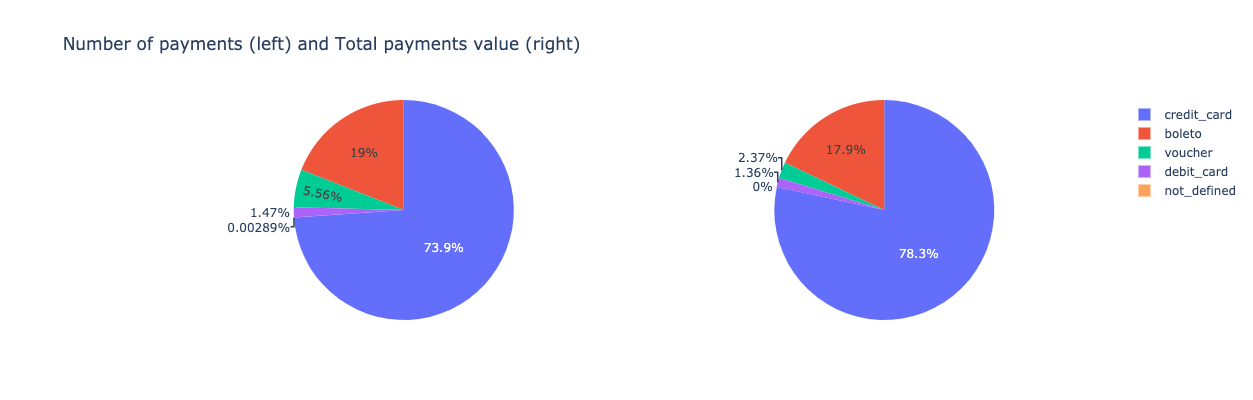

In [45]:
method_count = olist_payments['payment_type'].value_counts().to_frame().reset_index()
method_value = olist_payments.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()
# Plotly piechart
colors = None
trace1 = go.Pie(labels=method_count['index'], values=method_count['payment_type'],
                domain= {'x': [0, .48]}, marker=dict(colors=colors))
trace2 = go.Pie(labels=method_value['payment_type'], values=method_value['payment_value'],
                domain= {'x': [0.52, 1]}, marker=dict(colors=colors))
layout = dict(title= "Number of payments (left) and Total payments value (right)", 
              height=400, width=800,)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


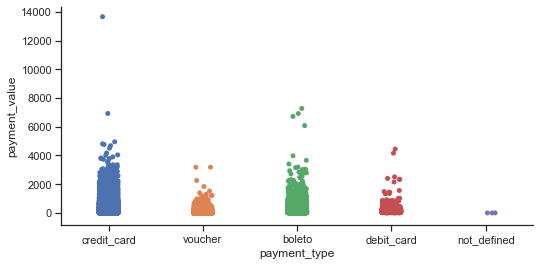

In [46]:
ax = sns.catplot(x="payment_type", y="payment_value",data=olist_payments, aspect=2, height=3.8)

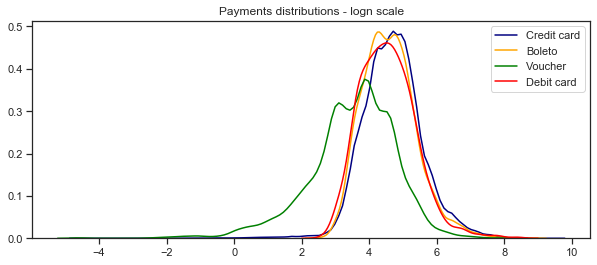

In [47]:
plt.figure(figsize=(10,4))
plt.title("Payments distributions - logn scale")
p1 = sns.kdeplot(olist_payments[olist_payments.payment_type == 'credit_card']['value_log'], color="navy", label='Credit card')
p2 = sns.kdeplot(olist_payments[olist_payments.payment_type == 'boleto']['value_log'], color="orange", label='Boleto')
p3 = sns.kdeplot(olist_payments[olist_payments.payment_type == 'voucher']['value_log'], color="green", label='Voucher')
p4 = sns.kdeplot(olist_payments[olist_payments.payment_type == 'debit_card']['value_log'], color="red", label='Debit card')

In [48]:
# Installments
# Only credit cards can have more than one installment:

In [49]:
olist_payments[olist_payments['payment_installments'] > 1]['payment_type'].value_counts().to_frame()

payment_type
credit_card         51338

In [50]:
#When we plot the number of installments we can see some patterns. Most sellers in Brazil offer the option to divide the payment up to 
#10 installments and the mean product value increases until this number. Seven and nine installments are not usual.

/Users/shubh/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



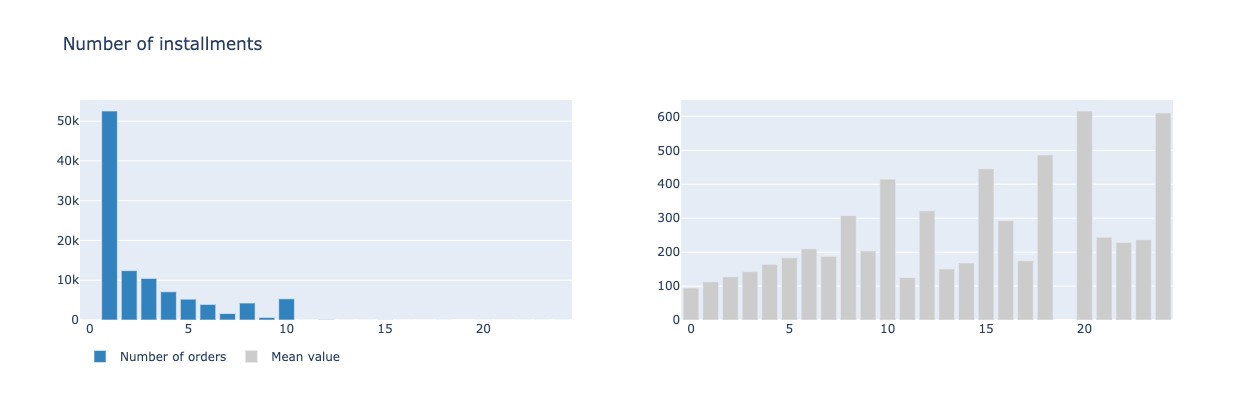

In [51]:
ins_count = olist_payments.groupby('payment_installments').size()
ins_mean = olist_payments.groupby('payment_installments')['payment_value'].mean()

trace0 = go.Bar(
    x=ins_count.index,
    y=ins_count.values,
    name='Number of orders',
    marker=dict(color='rgb(49,130,189)')
)
trace1 = go.Bar(
    x=ins_mean.index,
    y=ins_mean.values,
    name='Mean value',
    marker=dict(color='rgb(204,204,204)')
)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(height=400, width=800, title='Number of installments',
                     legend=dict(orientation="h"))
fig.show()

In [52]:
# creating an aggregation
avg_score_per_category = all_data.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name', 'count', 'mean']

avg_score_per_category

product_category_name  count      mean
0   agro industry and commerce    252  4.150794
1             air conditioning    302  3.920530
2                          art    219  3.917808
3        arts and craftmanship     24  4.125000
4                        audio    381  3.824147
..                         ...    ...       ...
66                  stationery   2625  4.176381
67      tablets printing image     87  4.045977
68                   telephony   4726  3.938214
69                        toys   4281  4.142490
70               watches gifts   6213  4.000644

[71 rows x 3 columns]

In [53]:
# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False).reset_index(drop=True).loc[0:10,:]
avg_score_per_category

product_category_name  count      mean
0                  books general interest    565  4.431858
1                          books imported     62  4.419355
2                         books technical    272  4.345588
3                 costruction tools tools    105  4.333333
4   small appliances home oven and coffee     78  4.320513
5                              food drink    291  4.312715
6                     luggage accessories   1163  4.290628
7                              cine photo     74  4.216216
8                       home appliances 2    271  4.202952
9                                pet shop   2030  4.188670
10                          fashion shoes    278  4.179856

Text(0.5, 1.0, 'Categories Review Score')

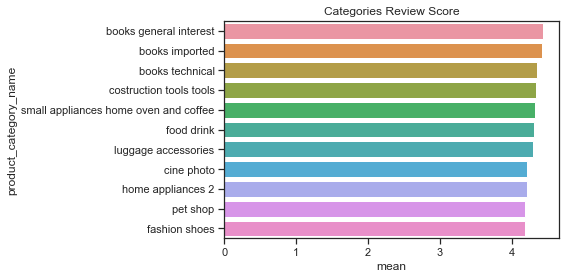

In [54]:
ax = sns.barplot(x="mean", y="product_category_name", data=avg_score_per_category)
ax.set_title('Categories Review Score')

### Total Sales month vs DayofWeek

In [55]:
# creating a purchase day feature
df2 = all_data.copy()
# creating an aggregation
sales_per_purchase_month = df2.groupby(['order_purchase_month', 'order_purchase_mon', 'order_purchase_day'], as_index=False).payment_value.sum()
sales_per_purchase_month = sales_per_purchase_month.sort_values(by=['order_purchase_month'], ascending=True)


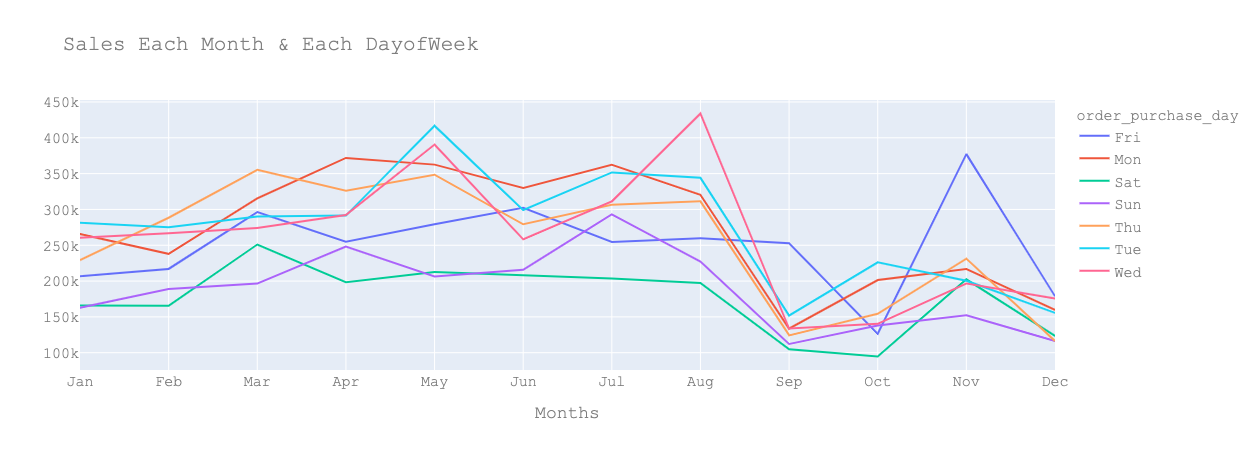

In [56]:
import plotly.express as px

df3 = sales_per_purchase_month
fig = px.line(df3, x="order_purchase_mon", y="payment_value", color='order_purchase_day', title='Sales Each Month & Each DayofWeek')

fig.update_layout(
    title="Sales Each Month & Each DayofWeek",
    xaxis_title="Months",
    yaxis_title="Sales(in $$)",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()



### Trends for Product Review Scores

In [57]:
df2['review_dayofweek'] = df2.review_answer_timestamp.apply(lambda x: x.dayofweek)
df2['review_day'] = df2['review_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df2['review_month'] = df2.review_answer_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [58]:
# creating a purchase day feature
#df = Olist.copy()
# creating an aggregation
#sales_per_purchase_month = Olist.groupby(['order_purchase_month', 'order_purchase_mon', 'order_purchase_day'], as_index=False).payment_value.sum()
#sales_per_purchase_month = sales_per_purchase_month.sort_values(by=['order_purchase_month'], ascending=True)

review_score_per_month = df2.groupby(['review_month', 'review_day'], as_index=False).review_score.mean()
#review_score_per_month = review_score_per_month.sort_values(by=['review_day'], ascending=True)
review_score_per_month

review_month review_day  review_score
0           Apr        Fri      3.827811
1           Apr        Mon      3.738133
2           Apr        Sat      3.846154
3           Apr        Sun      3.817905
4           Apr        Thu      3.855518
..          ...        ...           ...
79          Sep        Sat      4.278271
80          Sep        Sun      4.137255
81          Sep        Thu      4.200000
82          Sep        Tue      4.143098
83          Sep        Wed      4.199546

[84 rows x 3 columns]

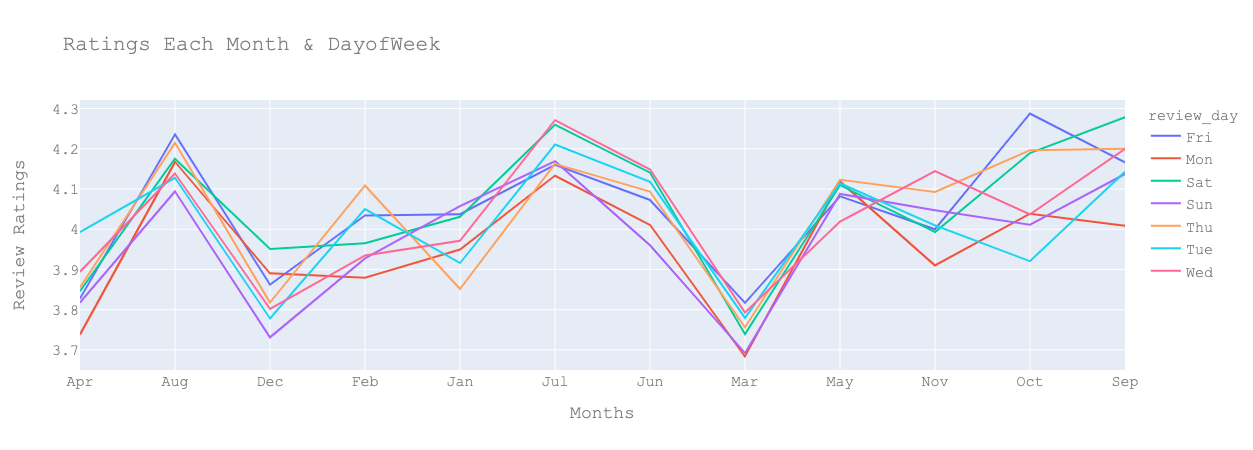

In [59]:
import plotly.express as px

df4 = review_score_per_month
fig = px.line(df4, x="review_month", y="review_score", color='review_day', title='Sales Each Month & Each DayofWeek')

fig.update_layout(
    title="Ratings Each Month & DayofWeek",
    xaxis_title="Months",
    yaxis_title="Review Ratings",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()



In [60]:
# creating an aggregation
avg_score_per_category = df2.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['Product Category', 'Number of Reviews', 'Average Review Ratings']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['Number of Reviews'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='Number of Reviews', ascending=False)
avg_score_per_category

Product Category  Number of Reviews  \
7                            bed bath table              11990   
43                            health beauty              10030   
65                           sports leisure               9005   
39                          furniture decor               8833   
15                    computers accessories               8151   
49                               housewares               7380   
70                            watches gifts               6213   
68                                telephony               4726   
42                             garden tools               4590   
5                                      auto               4400   
69                                     toys               4281   
20                               cool stuff               3999   
59                                perfumery               3589   
6                                      baby               3204   
26                              electronics               2847   
66                               stationery               2625   
28                 fashion bags accessories               2170   
60                                 pet shop               2030   
57                         office furniture               1788   
16                           consoles games               1192   
53                      luggage accessories               1163   
17          construction tools construction                955   
44                          home appliances                826   
56                      musical instruments                719   
63                         small appliances                705   
48                        home construction                635   
8                    books general interest                565   
40                    furniture living room                532   
36                                     food                526   
47                             home confort                478   
24                                   drinks                390   
4                                     audio                381   
54                             market place                332   
18                construction tools lights                314   
1                          air conditioning                302   
51  kitchen dining laundry garden furniture                299   
37                               food drink                291   
31                            fashion shoes                278   
34                          fixed telephony                272   
10                          books technical                272   
50           industry commerce and business                272   
45                        home appliances 2                271   
0                agro industry and commerce                252   
21                 costruction tools garden                247   
14                                computers                220   
2                                       art                219   
62                   signaling and security                201   
19                construction tools safety                199   
12                       christmas supplies                155   
30                    fashion male clothing                145   
33                  fashion underwear beach                144   
38                        furniture bedroom                126   
22                  costruction tools tools                105   

    Average Review Ratings  
7                 3.867056  
43                4.119143  
65                4.092837  
39                3.895279  
15                3.926144  
49                4.045257  
70                4.000644  
68                3.938214  
42                4.011329  
5                 4.038636  
69                4.142490  
20                4.125781  
59                4.122875  
6                 3.995630  
26                4.027397 

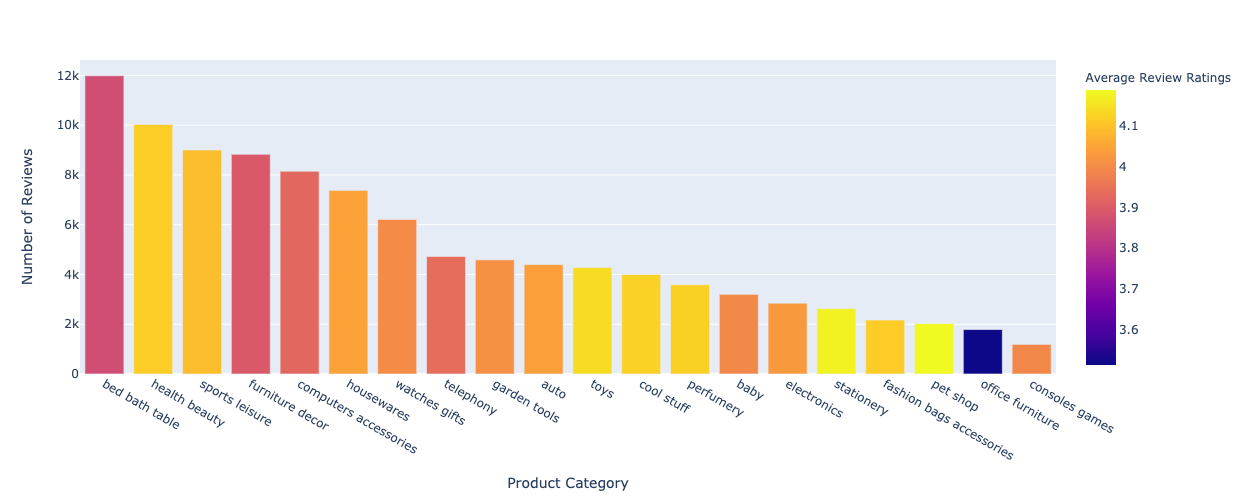

In [61]:
import plotly.express as px
avg_ratings = avg_score_per_category[:20]
fig = px.bar(avg_ratings, x='Product Category', y='Number of Reviews',
             hover_data=['Average Review Ratings'], color='Average Review Ratings',
             height=500)
fig.show()

In [87]:
# creating an aggregation
avg_score_per_user = df2.groupby('customer_unique_id', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_user.columns = ['customer_unique_id', 'Number of Reviews', 'Average Review Ratings']



In [88]:
avg_score_per_user

customer_unique_id  Number of Reviews  Average Review Ratings
0                 C00001                  1                     3.0
1                 C00002                  1                     5.0
2                 C00003                  1                     3.0
3                 C00004                  1                     1.0
4                 C00005                  1                     5.0
...                  ...                ...                     ...
94082             C96994                  1                     5.0
94083             C96995                  2                     1.0
94084             C96996                  1                     4.0
94085             C96997                  5                     5.0
94086             C96999                  1                     3.0

[94087 rows x 3 columns]

In [89]:
avg_score_per_user['Average Review Ratings'].value_counts()

5.000000    53919
4.000000    18060
1.000000    10494
3.000000     7834
2.000000     2991
            ...  
3.685714        1
4.076923        1
4.363636        1
1.444444        1
1.800000        1
Name: Average Review Ratings, Length: 65, dtype: int64

In [90]:
def label_race (row):
    if row['Average Review Ratings'] > 3.0 :
        return ' Satisfied'
    if row['Average Review Ratings'] >=0.0 and row['Average Review Ratings'] <= 3.0 :
        return 'Unsatisfied'
    return 'Not enough Information'

In [91]:
avg_score_per_user['satprediction'] = avg_score_per_user.apply (lambda row: label_race(row), axis=1)

In [93]:
avg_score_per_user.to_csv('csvfordash/customersat.csv')

In [107]:
pp = avg_score_per_user['satprediction'].value_counts()

In [118]:
s = pd.Series(pp)

In [128]:
a = s.loc['Unsatisfied']

In [129]:
b = s.loc[' Satisfied']

In [132]:
per = (b/(a+b))*100

In [133]:
per

77.15306046531401

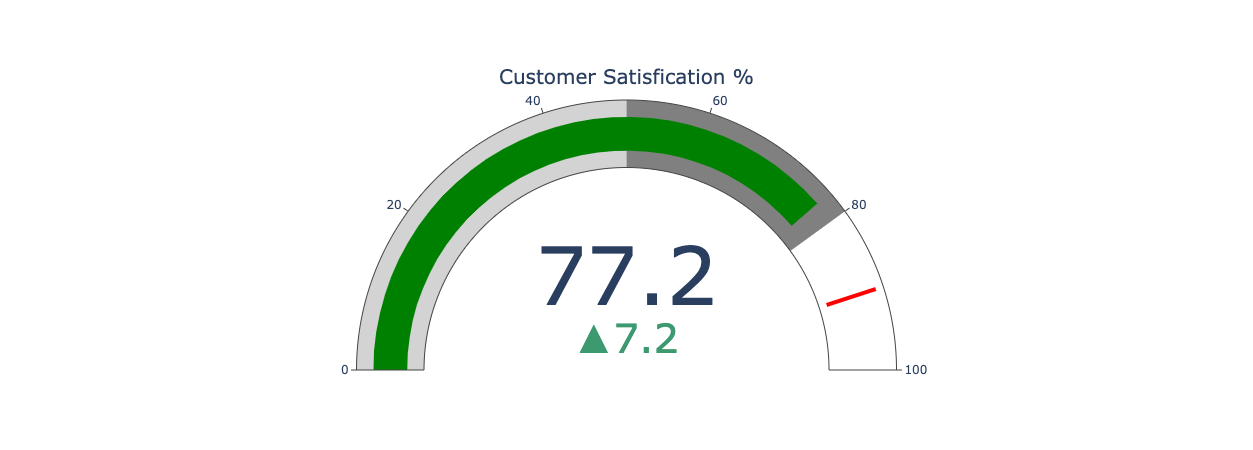

In [137]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = per,
    mode = "gauge+number+delta",
    title = {'text': "Customer Satisfication %"},
    delta = {'reference': 70},
    gauge = {'axis': {'range': [None, 100]},
             'steps' : [
                 {'range': [0, 50], 'color': "lightgray"},
                 {'range': [50, 80], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 90}}))

fig.show()

In [ ]:
# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['Number of Reviews'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='Number of Reviews', ascending=False)
avg_score_per_category

 Satisfied     72591
Unsatisfied    21496
Name: satprediction, dtype: int64

### Top Categories by Sales Revenue

In [62]:
sales_per_category = df2.groupby(['order_purchase_mon', 'product_category_name_english'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Purchase Month','Product Category', 'Sales Revenue']
sales_per_category

Purchase Month           Product Category  Sales Revenue
213            Feb      computers accessories      227799.07
111            Aug              health beauty      221325.17
339            Jul             bed bath table      202002.66
576            May              health beauty      198350.77
374            Jul              health beauty      197035.68
..             ...                        ...            ...
676            Oct          cds dvds musicals          61.11
694            Oct  fashion childrens clothes          54.09
568            May                    flowers          35.72
3              Apr      arts and craftmanship          34.22
774            Sep             home comfort 2          29.69

[797 rows x 3 columns]

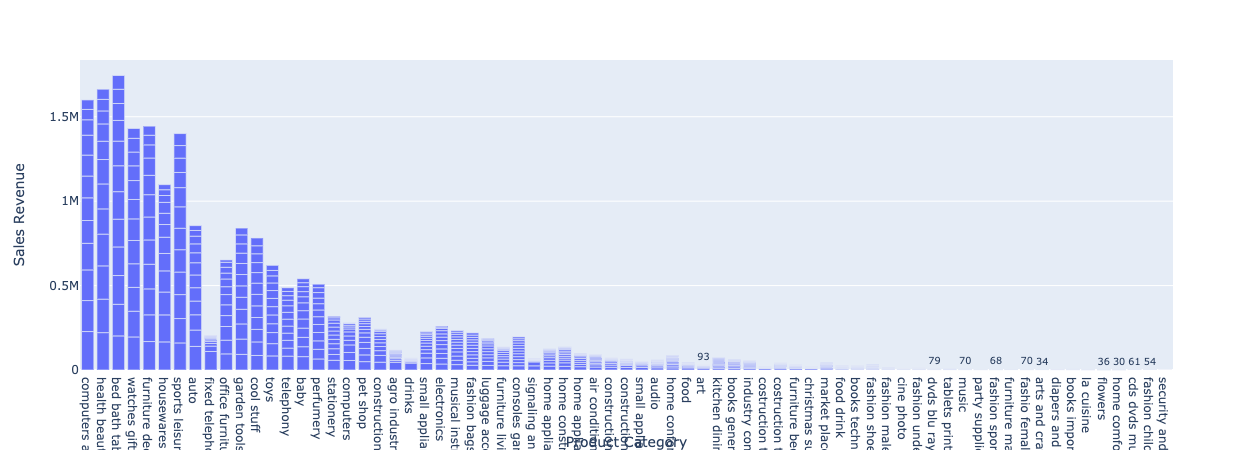

In [63]:
import plotly.express as px

df = sales_per_category
fig = px.bar(df, y='Sales Revenue', x='Product Category', text='Sales Revenue', hover_data=['Purchase Month'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='stack',uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


### Metrics for Digital Marketing Dashboard

## Brand/Category Performance across Years

### Horizontal Metrics for dashboard (YTD for 2018)

In [64]:
total_rev_year = df2.groupby(['order_purchase_year'], as_index=False).payment_value.sum()
#total_rev_year = total_rev_year[total_rev_year['order_purchase_year']== 2018]
total_rev_year

order_purchase_year  payment_value
0                 2016   7.504476e+04
1                 2017   9.080449e+06
2                 2018   1.100256e+07

In [65]:
total_orders = df2.groupby(['order_purchase_year'], as_index=False).order_id.nunique()
total_orders

0      309
1    43788
2    53158
Name: order_id, dtype: int64

In [66]:
total_category = df2.product_category_name.nunique()
total_category

71

In [67]:
total_customers = df2.customer_unique_id.nunique()
total_customers

94087

### Vertical Metrics for Dashboard

### 1. Total Sales by category 

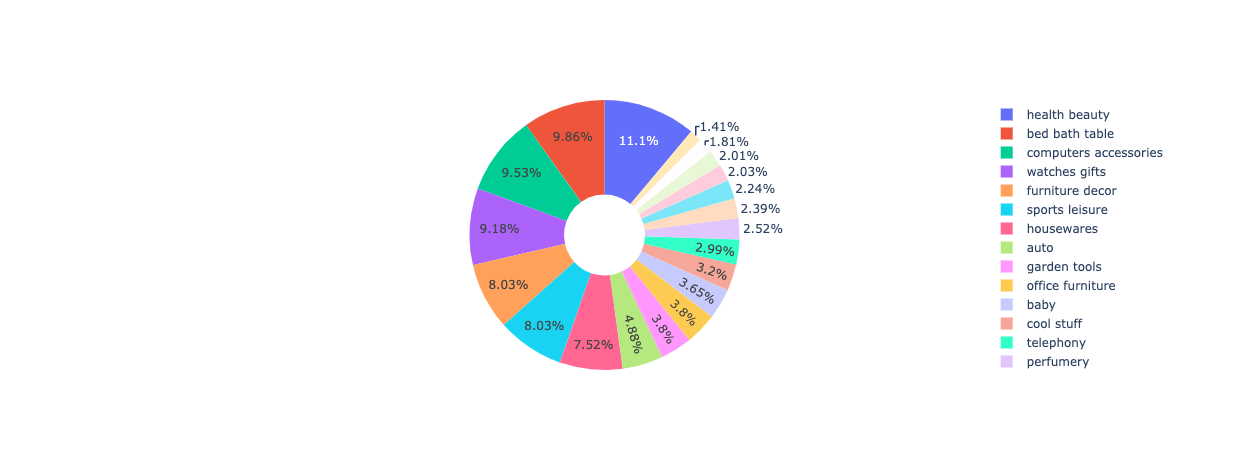

In [68]:
import plotly.graph_objects as go

df5 = all_data[all_data.order_purchase_year == 2018]
sales_per_category = df5.groupby(['product_category_name_english'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Product Category', 'Sales Revenue']

sales_per_category = sales_per_category[:20]
labels = sales_per_category['Product Category']
values = sales_per_category['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [69]:
sales_per_category

Product Category  Sales Revenue
43                    health beauty     1035450.32
7                    bed bath table      919020.23
15            computers accessories      887523.88
69                    watches gifts      855366.40
39                  furniture decor      748402.05
64                   sports leisure      748182.96
49                       housewares      700860.06
5                              auto      454557.50
42                     garden tools      354085.60
57                 office furniture      354045.16
6                              baby      340065.02
20                       cool stuff      298401.09
67                        telephony      278120.15
59                        perfumery      234835.83
68                             toys      222928.37
17  construction tools construction      208860.86
65                       stationery      188926.11
60                         pet shop      187354.72
26                      electronics      168509.79
56              musical instruments      131227.57

In [70]:
total_rev_month = all_data.groupby(['order_purchase_year', 'order_purchase_mon', 'product_category_name_english'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_month.columns = ['Sales Year','Sales Month','Product Category' , 'Sales Revenue']
total_rev_month

Sales Year Sales Month                         Product Category  \
0           2016         Dec                 fashion bags accessories   
1           2016         Oct                         air conditioning   
2           2016         Oct                                    audio   
3           2016         Oct                                     auto   
4           2016         Oct                                     baby   
...          ...         ...                                      ...   
1247        2018         May                   tablets printing image   
1248        2018         May                                telephony   
1249        2018         May                                     toys   
1250        2018         May                            watches gifts   
1251        2018         Sep  kitchen dining laundry garden furniture   

      Sales Revenue  
0             19.62  
1           4675.43  
2            183.03  
3           2716.70  
4           2344.43  
...             ...  
1247          58.19  
1248       27718.21  
1249       38166.71  
1250      150688.81  
1251         166.46  

[1252 rows x 4 columns]

### 2. Category Sales across years

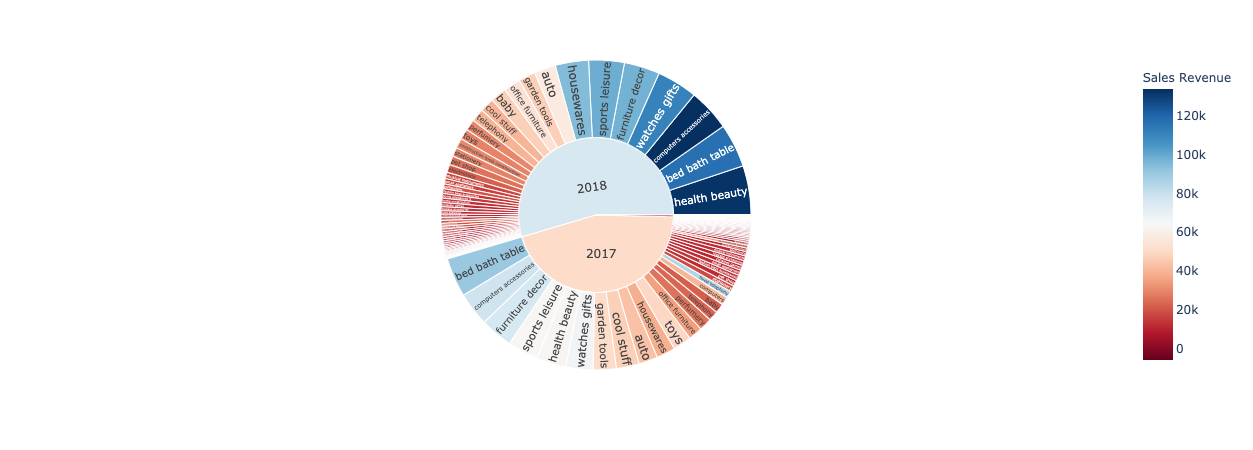

In [71]:
import plotly.express as px
import numpy as np
df = total_rev_month
fig = px.sunburst(df, path=['Sales Year', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Sales Revenue'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

### 3. Sales by Hour

In [72]:
total_rev_hour = all_data[all_data['order_purchase_year'] == 2018].groupby(['order_purchase_hour', 'product_category_name_english'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales Hour','Product Category' , 'Sales Revenue']
total_rev_hour


Sales Hour            Product Category  Sales Revenue
0              0  agro industry and commerce         610.22
1              0            air conditioning        1801.40
2              0                         art        1206.29
3              0                       audio         587.91
4              0                        auto        7175.56
...          ...                         ...            ...
1316          23                  stationery        6965.88
1317          23      tablets printing image         129.32
1318          23                   telephony        9735.20
1319          23                        toys        6869.96
1320          23               watches gifts       42309.88

[1321 rows x 3 columns]

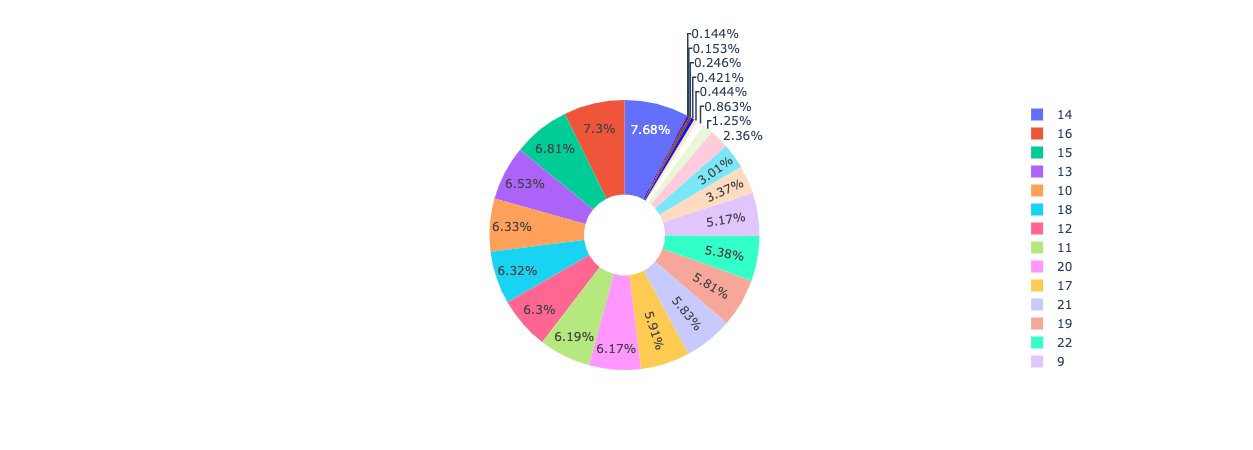

In [73]:
labels = total_rev_hour['Sales Hour']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

### 4. Category Sales by Hour

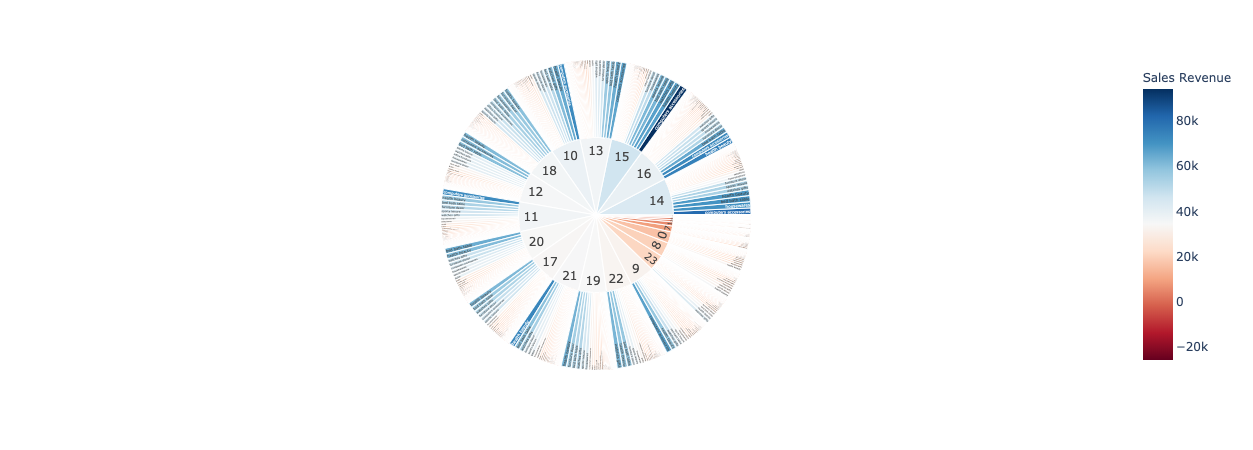

In [74]:
df = total_rev_hour
fig = px.sunburst(df, path=['Sales Hour', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Product Category'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

### 5. Category Sales by Day of Week

In [75]:
total_rev_hour = all_data[all_data['order_purchase_year'] == 2018].groupby(['order_purchase_day', 'product_category_name_english'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales DayofWeek','Product Category' , 'Sales Revenue']
total_rev_hour


Sales DayofWeek            Product Category  Sales Revenue
0               Fri  agro industry and commerce        5839.40
1               Fri            air conditioning        5826.38
2               Fri                         art        2398.56
3               Fri       arts and craftmanship         408.95
4               Fri                       audio        4834.79
..              ...                         ...            ...
458             Wed                  stationery       33990.66
459             Wed      tablets printing image         263.43
460             Wed                   telephony       61517.25
461             Wed                        toys       34728.87
462             Wed               watches gifts      135654.37

[463 rows x 3 columns]

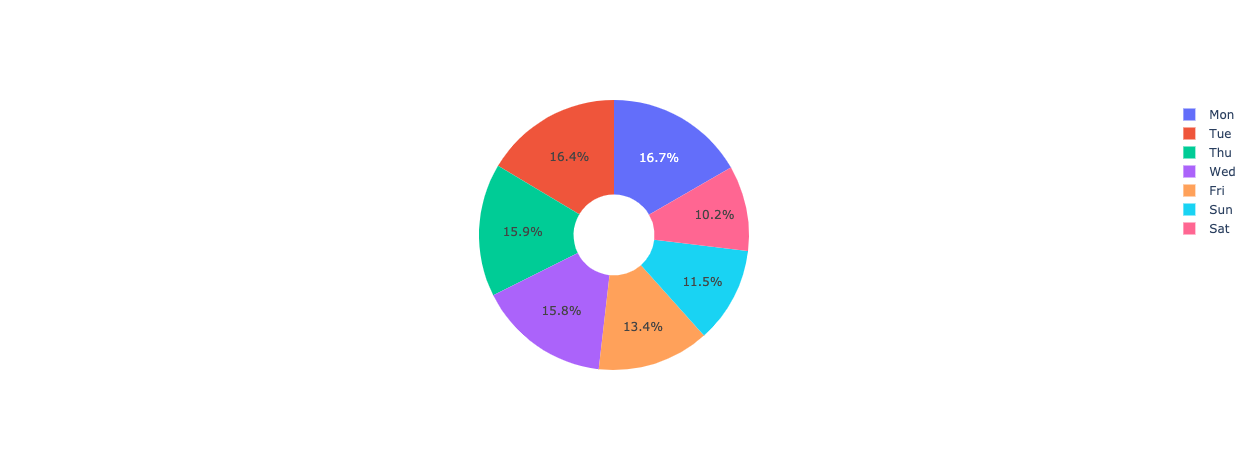

In [76]:
labels = total_rev_hour['Sales DayofWeek']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

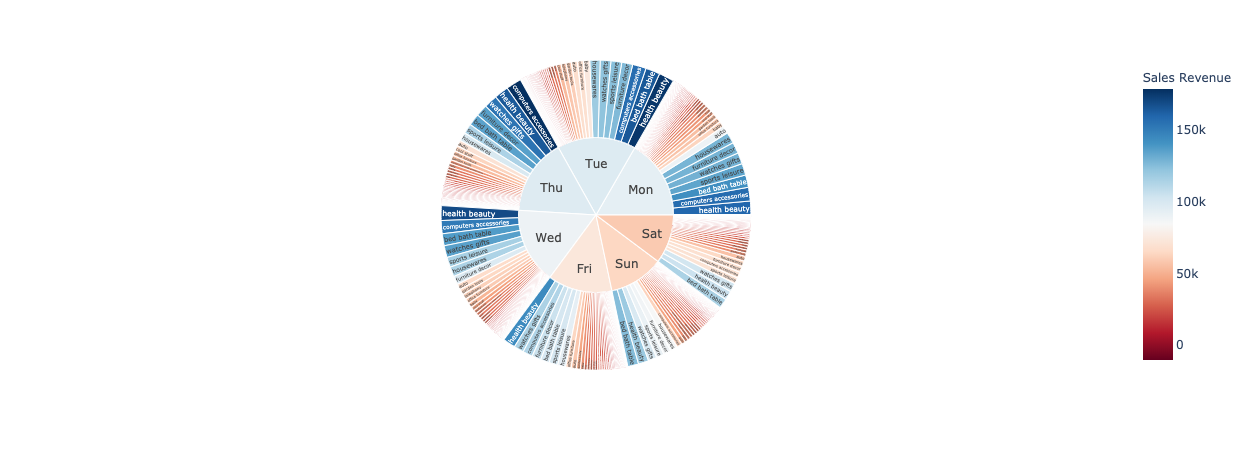

In [77]:
df = total_rev_hour
fig = px.sunburst(df, path=['Sales DayofWeek', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Product Category'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

### 6. Category Activity wrt purchases

In [78]:
cat_activity = all_data[all_data['order_purchase_year'] == 2018].groupby(['product_category_name_english']).order_id.nunique()
#cat_activity = cat_activity.sort_values(['Activity'], ascending=True)
cat_activity = pd.DataFrame(cat_activity)
cat_activity.columns = [ 'Activity']
cat_activity = cat_activity.sort_values(by=['Activity'], ascending=False)
cat_activity

Activity
product_category_name_english          
health beauty                      5402
bed bath table                     4909
sports leisure                     4058
computers accessories              4053
watches gifts                      3493
...                                 ...
home comfort 2                        7
fashion sport                         5
la cuisine                            3
fashion childrens clothes             3
cds dvds musicals                     1

[70 rows x 1 columns]

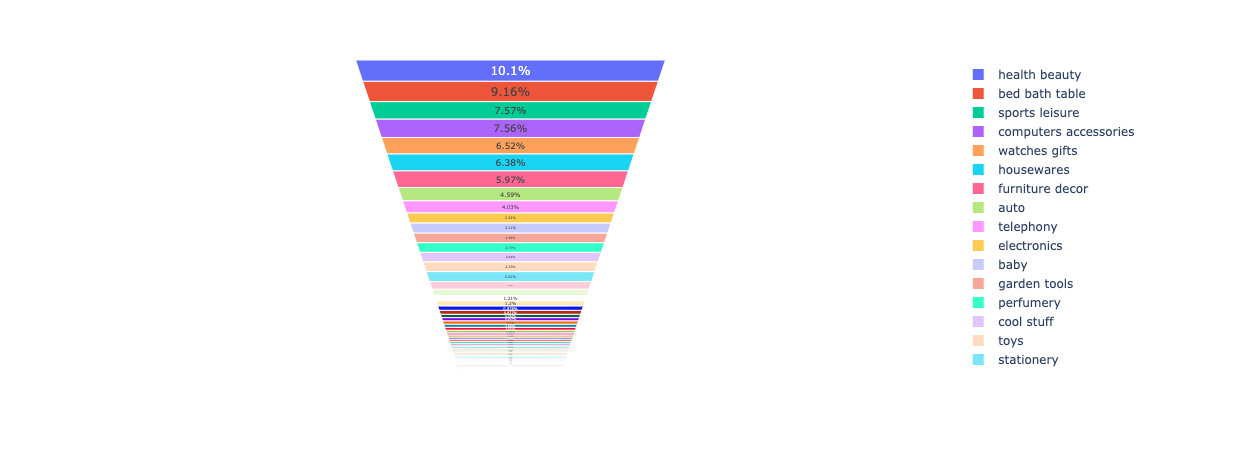

In [79]:
fig = px.funnel_area(names=cat_activity.index,
                    values=cat_activity.Activity)
fig.show()